#Decission Tree

Decission Tree adalah metode pembelajaran terawasi (supervised learning) yang digunakan untuk tugas klasifikasi dan regresi, cara kerjanya adalah dengan membagi dataset kedalam subset verdasarkan nilai fitur, menciptakan struktur seperti pohon dimana setiap node internal merepresentasikan "uji" pada suatu fitur, setiap cabang merepresentasikan hasil dari uji tersebut, dan setiap node daun merepresentasikan label kelas (untuk klasifikasi) atau nilai (untuk regresi).

- criterion : digunakan untuk metode pemisahan pada node (kotak), menggunakan 'gini' atau 'entropy' Entropy : mengukur ketidakpastian dalam set data, senakin rendah entropy, semakin tinggi nilai informasi yang didapat dari pemisahan
gini : mengukur seberapa sering elemen dalam dataset salah diklasifikasi jika dipilih secara acak
- max_depth : mengukur kedalaman naksimal dari pohon untuk mengontrol overfitting

#Decision Tree Classifier

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [5]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [7]:
wine = load_wine()
x = wine.data #fitur
y = wine.target #target

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [19]:
model1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 0)
#training time
model1.fit(x_train, y_train)

#membuat prediksi
y_pred = model1.predict(x_test)

#evaluasi model
akurasi = accuracy_score(y_test, y_pred)
print(f'hasil akurasi = {akurasi * 100:.2f}%')
print('data prediksi \n',y_pred)
print('data asli \n',y_test)

hasil akurasi = 97.22%
data prediksi 
 [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 0 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0]
data asli 
 [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0]


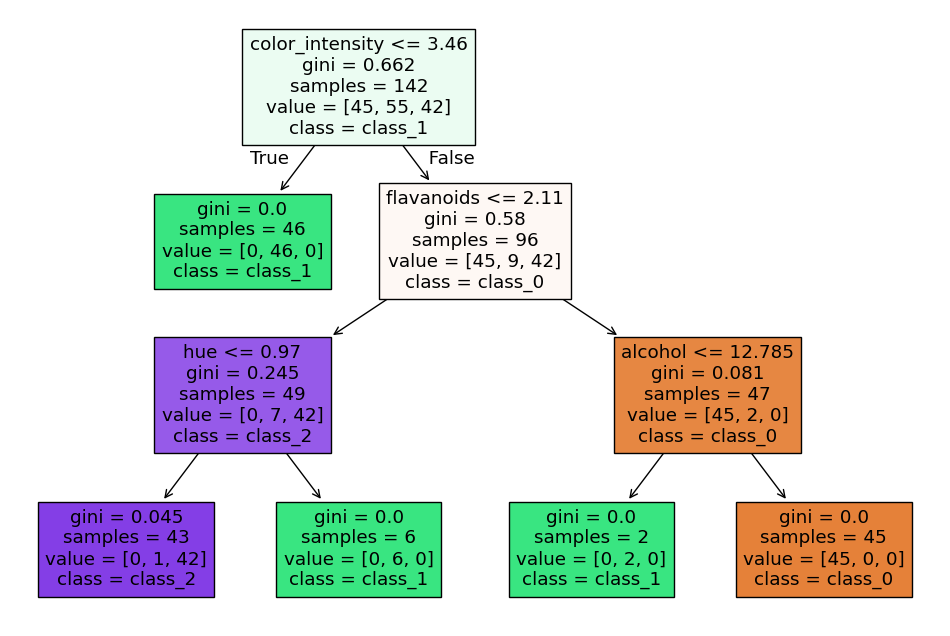

In [23]:
#visualisasikan decision tree
plt.figure(figsize = (12,8))
tree.plot_tree(model1, feature_names = wine.feature_names, class_names = wine.target_names, filled = True)
plt.show()

#Decision Tree Regressor

In [42]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [43]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [45]:
diabetes = load_diabetes()
x = diabetes.data[:,:2] #mengambil 2 data pertama
y = diabetes.target

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.225, random_state=0)

hasil MSE = 5454.718606490929


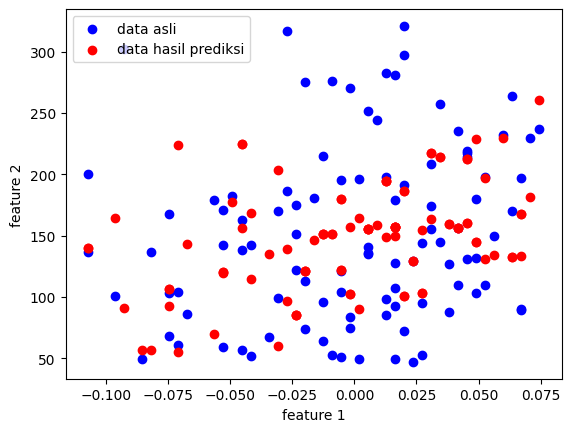

In [52]:
model2 = DecisionTreeRegressor(random_state = 0)
#training model
model2.fit(x_train, y_train)

#prediksi
y_pred = model2.predict(x_test)

#evaluasi
mse = mean_squared_error(y_test, y_pred)
print(f'hasil MSE = {mse}')

#plot
plt.scatter(x_test[:,0], y_test, color='blue', label='data asli')
plt.scatter(x_test[:,0], y_pred, color='red', label='data hasil prediksi')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

#Support Vector Machine

Support Vector Machine (SVM) adalah algoritma pembelajaran terawasi yang digunakan untuk tugas klasifikasi dan regresi. algoritma ini bekerja dengan menemukan hyperplane optimal (pada klasifikasi) atau garis (pada regresi) yag paling baik memisahkan data

Kernel:
- Linear Kernel: digunakan ketika data dapat dipisahkan secara linear, kernel ini menghitung produk dalam antara dua vektor, dan cocok untuk dataset yang dapat dipisahkan dengan garis lurus.
- RBF (Radial Basis Function Kernel): adalah kernel non-linear yang banyak digunakan dalam SVM. Kernel ini bekerja dengan memetakan data ke dalam ruang dimensi yg lebih tinggi, membuat data yang tidak dapat dipisahkan secara linear dalam ruang asli menjadi dapat dipisahkan di ruang yg lebih tinggi
- polynomial kernel: adalah kernel non-linear yg cocok untuk dataset yang memiliki hubungan non-linear antara fitur. ini memungkinkan SVM untuk memisahkan data menggunakan kurval polinomial.
- sigmoid kernel: berasal dari fungsi aktivasi sigmoid yg digunakan dalam jaringan saraf tiruan (neural network). ini bekerja dengan memetakan titik data ke ruang dimensi yg lebih tinggi dengan menggunakan fungsi sigmoid

In [53]:
from sklearn.svm import SVC
wine = load_wine()
x = wine.data
y = wine.target

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model3 = SVC(kernel = 'linear')
#training
model3.fit(x_train,y_train)

#prediksi
y_pred = model3.predict(x_test)
akurasi = accuracy_score(y_test, y_pred)
print(f'hasil akurasi = {akurasi * 100:.2f}%')
print('data asli \n',y_test)
print('data prediksi \n',y_pred)

hasil akurasi = 97.22%
data asli 
 [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0]
data prediksi 
 [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 2 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0]


#Support Vector Machine Regressor (SVR)

hasil mean squared error =  3438.4878514921766


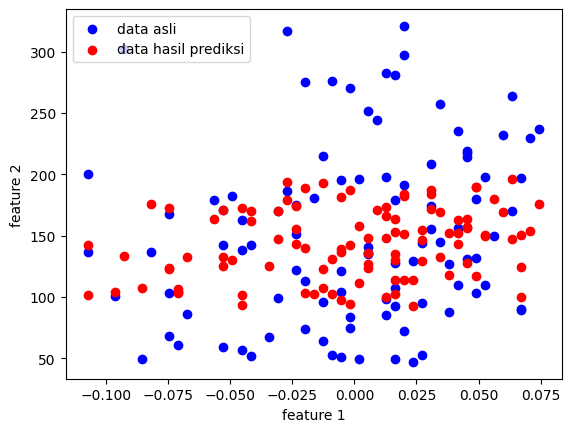

In [59]:
from sklearn.svm import SVR
diabetes = load_diabetes()
x = diabetes.data
y = diabetes.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.225, random_state=0)

model4 = SVR(kernel = 'sigmoid')
#training
model4.fit(x_train,y_train)

#prediksi
y_pred = model4.predict(x_test)

#evalusi
mse = mean_squared_error(y_test, y_pred)
print('hasil mean squared error = ', mse)

#plot
plt.scatter(x_test[:,0], y_test, color='blue', label='data asli')
plt.scatter(x_test[:,0], y_pred, color='red', label='data hasil prediksi')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()